# Finding best model with Gaussian Process Regression (GPR)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [3]:
# import own modules
import run_gpr
from gpr_alg import plot_data

# import external modules
import warnings
import pandas as pd
import numpy as np
import sklearn.gaussian_process as gp
import pickle

## Find best model

We start be performing a grid search to find the best model for the given dataset. The ouput is saved in a file.

In [4]:
# Load statistics from model fitting with different kernels
model_stats = pd.read_pickle('output/data/grid_search_stats_2D_100_iterations_with_noise.pkl')
model_stats

,kernel,stats,pred_mean,pred_cov
0,RBF: {'length_scale': 9.999999999999997e-06},0.158925,"[-0.3574277288048719, 0.4483481734478236, 1.23...","[[1.4999997743903037e-07, 0.0, 0.0, 0.0, 0.0, ..."
6,RationalQuadratic: {'length_scale': 1.00010900...,0.158925,"[-0.35742772880485385, 0.44834817344789174, 1....","[[1.4999997743903037e-07, 3.2954875604112623e-..."
7,RationalQuadratic: {'length_scale': 0.04201829...,0.127116,"[-0.35742752525730026, 0.4483484150290673, 1.2...","[[1.4999992969944032e-07, 5.750955267558311e-1..."
8,RationalQuadratic: {'length_scale': 0.04201829...,0.127116,"[-0.3574275252569583, 0.44834841502920497, 1.2...","[[1.4999993003250722e-07, 5.739853037312059e-1..."
9,RationalQuadratic: {'length_scale': 0.04201828...,0.127116,"[-0.35742752525738997, 0.4483484150290131, 1.2...","[[1.49999929588418e-07, 5.784261958297066e-14,..."
10,RationalQuadratic: {'length_scale': 0.04201828...,0.127116,"[-0.3574275252573855, 0.4483484150290149, 1.23...","[[1.49999929588418e-07, 5.762057497804562e-14,..."
11,RationalQuadratic: {'length_scale': 0.04201830...,0.127116,"[-0.35742752525762, 0.4483484150289838, 1.2321...","[[1.49999929588418e-07, 5.762057497804562e-14,..."
12,RBF + WhiteKernel: {'k1': RBF(length_scale=0.2...,0.380867,"[-0.031293658646890155, 0.43169211064829005, 0...","[[0.26094751791659143, 0.031582700700045874, 0..."
13,RationalQuadratic + WhiteKernel: {'k1': Ration...,0.127127,"[-0.3574189530242178, 0.4483519841963961, 1.23...","[[1.5149917184542616e-05, 6.772238325680746e-1..."


In [5]:
# Sort dataframe
model_stats = model_stats.sort_values(by=['stats'])
model_stats

,kernel,stats,pred_mean,pred_cov
8,RationalQuadratic: {'length_scale': 0.04201829...,0.127116,"[-0.3574275252569583, 0.44834841502920497, 1.2...","[[1.4999993003250722e-07, 5.739853037312059e-1..."
9,RationalQuadratic: {'length_scale': 0.04201828...,0.127116,"[-0.35742752525738997, 0.4483484150290131, 1.2...","[[1.49999929588418e-07, 5.784261958297066e-14,..."
10,RationalQuadratic: {'length_scale': 0.04201828...,0.127116,"[-0.3574275252573855, 0.4483484150290149, 1.23...","[[1.49999929588418e-07, 5.762057497804562e-14,..."
7,RationalQuadratic: {'length_scale': 0.04201829...,0.127116,"[-0.35742752525730026, 0.4483484150290673, 1.2...","[[1.4999992969944032e-07, 5.750955267558311e-1..."
11,RationalQuadratic: {'length_scale': 0.04201830...,0.127116,"[-0.35742752525762, 0.4483484150289838, 1.2321...","[[1.49999929588418e-07, 5.762057497804562e-14,..."
13,RationalQuadratic + WhiteKernel: {'k1': Ration...,0.127127,"[-0.3574189530242178, 0.4483519841963961, 1.23...","[[1.5149917184542616e-05, 6.772238325680746e-1..."
6,RationalQuadratic: {'length_scale': 1.00010900...,0.158925,"[-0.35742772880485385, 0.44834817344789174, 1....","[[1.4999997743903037e-07, 3.2954875604112623e-..."
0,RBF: {'length_scale': 9.999999999999997e-06},0.158925,"[-0.3574277288048719, 0.4483481734478236, 1.23...","[[1.4999997743903037e-07, 0.0, 0.0, 0.0, 0.0, ..."
12,RBF + WhiteKernel: {'k1': RBF(length_scale=0.2...,0.380867,"[-0.031293658646890155, 0.43169211064829005, 0...","[[0.26094751791659143, 0.031582700700045874, 0..."


In [6]:
for row in range(model_stats.shape[0]):
    print(model_stats['kernel'].iloc[row])

RationalQuadratic: {'length_scale': 0.042018294716318606, 'alpha': 0.15828839116400673}
RationalQuadratic: {'length_scale': 0.042018283478270656, 'alpha': 0.1582888029096081}
RationalQuadratic: {'length_scale': 0.04201828363242716, 'alpha': 0.15828880388399708}
RationalQuadratic: {'length_scale': 0.042018290966301684, 'alpha': 0.15828873827691858}
RationalQuadratic: {'length_scale': 0.04201830103857207, 'alpha': 0.15828908726490615}
RationalQuadratic + WhiteKernel: {'k1': RationalQuadratic(alpha=0.158, length_scale=0.042), 'k2': WhiteKernel(noise_level=1e-05), 'k1__length_scale': 0.04202075163185391, 'k1__alpha': 0.15828850725669028, 'k1__length_scale_bounds': (1e-05, 100000.0), 'k1__alpha_bounds': (1e-05, 100000.0), 'k2__noise_level': 9.999999999999997e-06, 'k2__noise_level_bounds': (1e-05, 100000.0)}
RationalQuadratic: {'length_scale': 1.000109009842582e-05, 'alpha': 0.9991132248694728}
RBF: {'length_scale': 9.999999999999997e-06}
RBF + WhiteKernel: {'k1': RBF(length_scale=0.23), 'k2

We compare the analyse the fit with the mean absolut error and a model where the kernel includes a white noise kernel.

In [7]:
# Get model with smallest mean absolut error
mean_prediction_best =  model_stats['pred_mean'].iloc[0]
cov_prediction_best = model_stats['pred_cov'].iloc[0]

print('Kernel: ' + str(model_stats['kernel'].iloc[0]))
print('Mean absolut error: ' + str(model_stats['stats'].iloc[0]))

Kernel: RationalQuadratic: {'length_scale': 0.042018294716318606, 'alpha': 0.15828839116400673}
Mean absolut error: 0.127115509778665


In [8]:
# Get model with white noise kernel
mean_prediction_wk =  model_stats['pred_mean'].iloc[8]
cov_prediction_wk = model_stats['pred_cov'].iloc[8]

print('Kernel: ' + str(model_stats['kernel'].iloc[8]))
print('Mean absolut error: ' + str(model_stats['stats'].iloc[8]))

Kernel: RBF + WhiteKernel: {'k1': RBF(length_scale=0.23), 'k2': WhiteKernel(noise_level=0.216), 'k1__length_scale': 0.23041651711417108, 'k1__length_scale_bounds': (1e-05, 100000.0), 'k2__noise_level': 0.2162502326524068, 'k2__noise_level_bounds': (1e-05, 100000.0)}
Mean absolut error: 0.3808673311147613


In [9]:
# Load grid and data
grid_x1, grid_x2, grid_train, full_grid, data_train, data = run_gpr.create_2D_data(add_noise=True)

applying conditions
train set size: 0.79


<IPython.core.display.Javascript object>


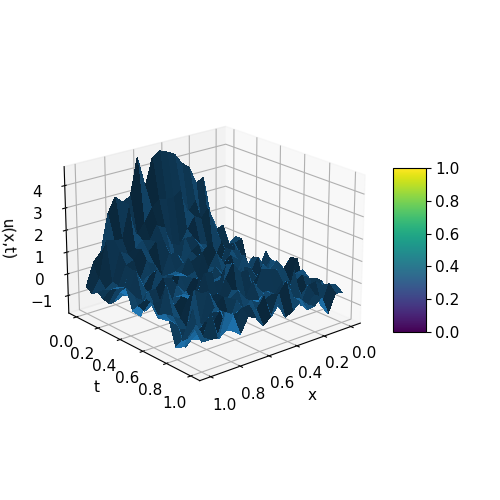

In [10]:
# Plot original data
plot_data.make_3D_surface_plot(x=grid_x1, y=grid_x2, z=data.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]), file_name='original_data_noise.png')

<IPython.core.display.Javascript object>


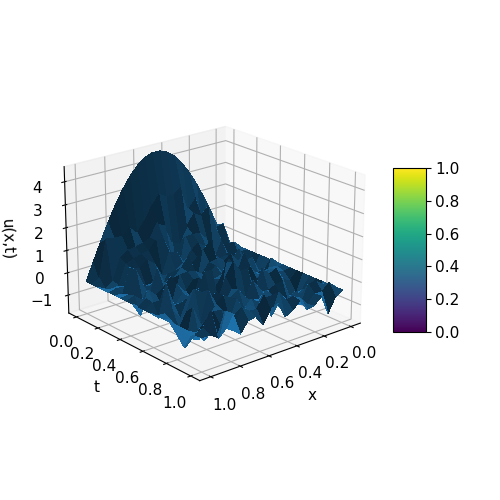

<IPython.core.display.Javascript object>


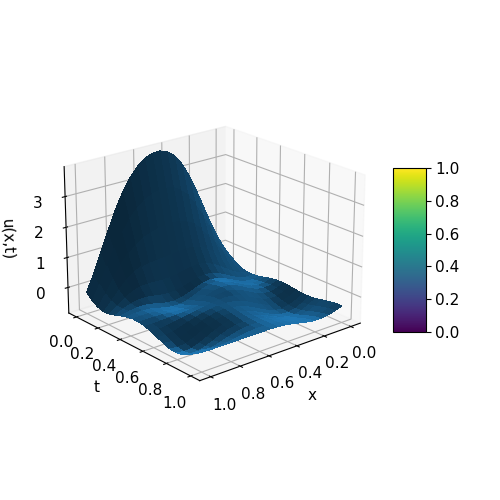

In [11]:
# Plot fitted data
plot_data.make_3D_surface_plot(x=grid_x1, y=grid_x2, z=mean_prediction_best.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]), file_name='fitted_data_noise.png')

plot_data.make_3D_surface_plot(x=grid_x1, y=grid_x2, z=mean_prediction_wk.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]), file_name='fitted_data_noise_wk.png')

<IPython.core.display.Javascript object>


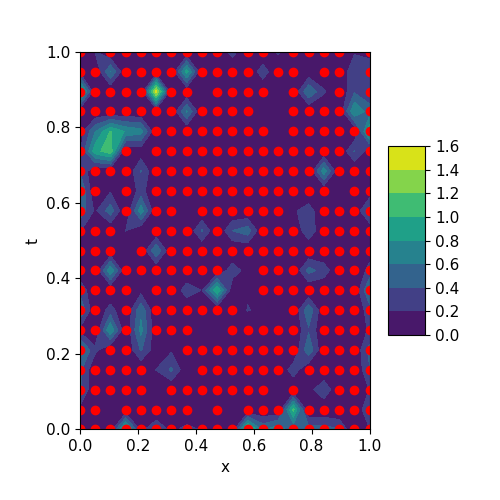

<IPython.core.display.Javascript object>


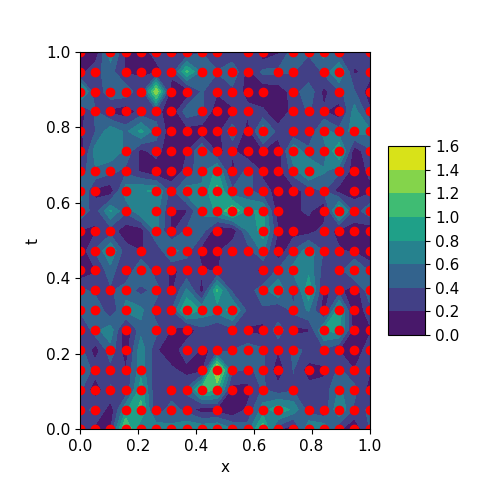

In [12]:
error_best = abs(data.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]) - mean_prediction_best.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]))
error_wk = abs(data.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]) - mean_prediction_wk.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]))

# Plot error
plot_data.make_3D_contour_plot(x=grid_x1, y=grid_x2, z=error_best, add_train=True, x_train=grid_train[:,0], y_train=grid_train[:,1], file_name='error_noise.png')

plot_data.make_3D_contour_plot(x=grid_x1, y=grid_x2, z=error_wk, add_train=True, x_train=grid_train[:,0], y_train=grid_train[:,1], file_name='error_noise_wk.png')

applying conditions
train set size: 0.79
0.3337955436576651
0.16425335693606946


<IPython.core.display.Javascript object>


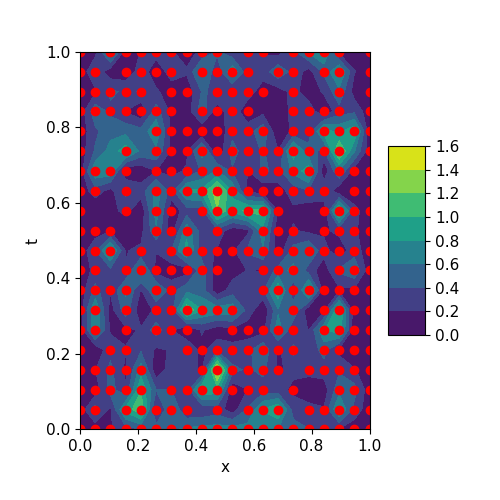

<IPython.core.display.Javascript object>


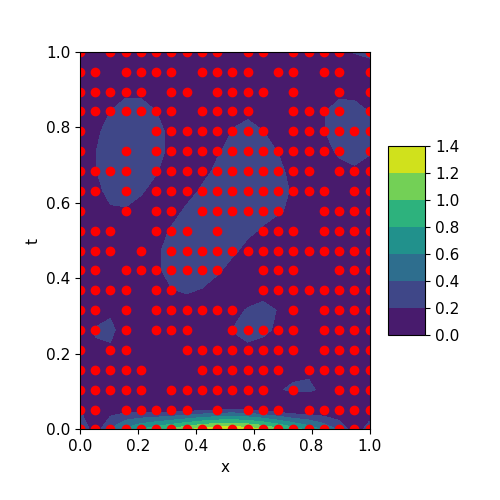

In [13]:
grid_x1, grid_x2, grid_train, full_grid, data_train, data = run_gpr.create_2D_data(add_noise=False)
error_best = abs(data.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]) - mean_prediction_best.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]))
error_wk = abs(data.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]) - mean_prediction_wk.reshape(np.shape(grid_x1)[0], np.shape(grid_x1)[1]))
print(np.mean(error_best))
print(np.mean(error_wk))
# Plot error
plot_data.make_3D_contour_plot(x=grid_x1, y=grid_x2, z=error_best, add_train=True, x_train=grid_train[:,0], y_train=grid_train[:,1], file_name='error_noise2.png')

plot_data.make_3D_contour_plot(x=grid_x1, y=grid_x2, z=error_wk, add_train=True, x_train=grid_train[:,0], y_train=grid_train[:,1], file_name='error_noise_wk2.png')